<a href="https://colab.research.google.com/github/dukalee/machine-learning/blob/main/02_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 다중 선형 회귀 (Multiple Linear Regression)
---

선형 회귀란 독립 변수 x의 변화에 따라 변화하는 종속 변수 y의 선형 관계를 모델링하는 것입니다.

독립 변수 x의 개수가 1개면 단순 선형 회귀 (Simple Linear Regression), 여러개가 되면 다중 선형 회귀 (Multiple Linear Regression)이 됩니다.

단순 선형 회귀식과 동일하지만, 차원이 높아지며 기울기(Coefficient)가 각 독립 변수마다 추가된 것이 특징입니다.

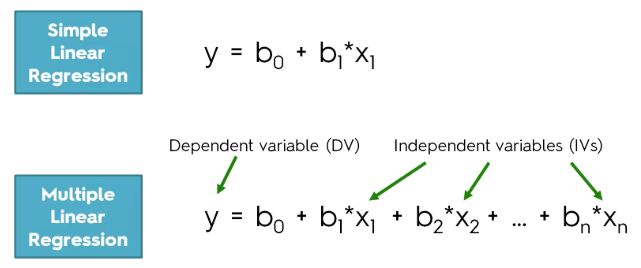

* $Y_i$ : 종속변수 y
* $B_0$ : 절편 (Intercept)
* $B_{1-n}$ : 기울기 (Coefficient)
* $X_{1-n}$ : 독립변수 x

#### 선형 회귀 분석의 4대 기본 가정 (Four Assumptions of Linear Regression) 

선형 회귀 분석은 아래 4가지를 충족해야지만 유의미한 선형 회귀 모델이 생성될 수 있습니다. 

##### <strong> 1. 선형성 (linearity) </strong>
* 선형 회귀 (Linear Regression)에만 적용됩니다. (비선형 모델에는 적용되지 않습니다.)

In [18]:
import pandas as pd

github = "https://raw.githubusercontent.com/dukalee/machine-learning/main/00-Datasets/iris.csv"
iris = pd.read_csv(github)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


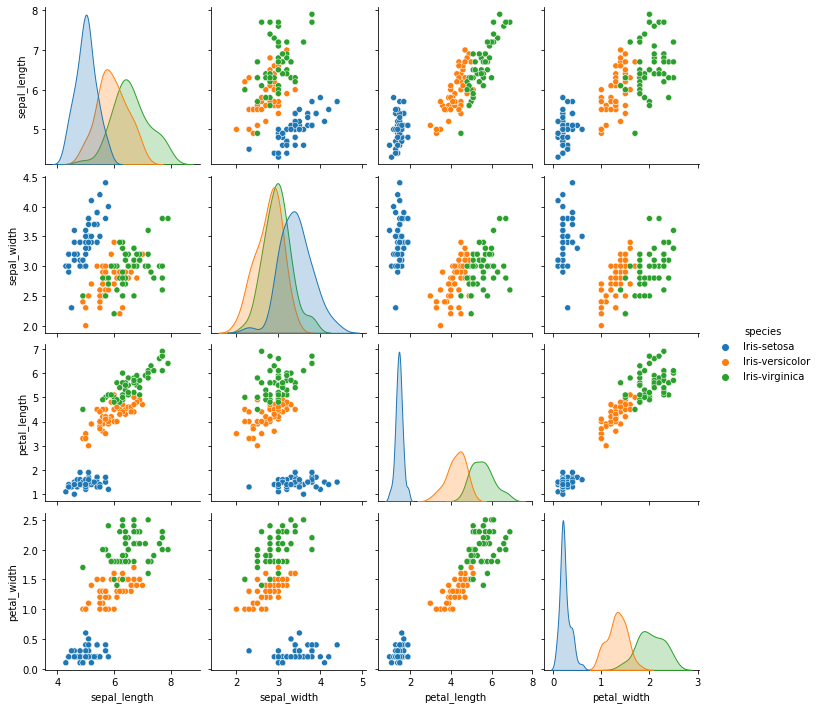

In [24]:
import seaborn as sns

sns.pairplot(iris, hue = "species")

sepal_length를 종속변수로 구한다고 했을 때, 대략적으로 petal_length와 petal_width는 선형 관계로 보이나, sepal_width는 선형성(linearity)를 만족하지 않는 것으로 보입니다.

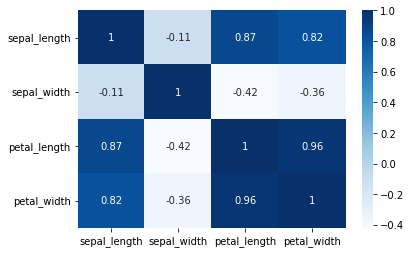

In [16]:
sns.heatmap(iris.corr(), cmap = "Blues", annot = True)

상관계수를 보았을때도, sepal_length와 sepal_width는 관계가 없는 것으로 보입니다.

In [66]:
from statsmodels.formula.api import ols

model = ols('sepal_length ~ sepal_width+petal_length+petal_width', iris)
res = model.fit()

In [67]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     297.0
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           6.28e-62
Time:                        14:09:03   Log-Likelihood:                -37.000
No. Observations:                 150   AIC:                             82.00
Df Residuals:                     146   BIC:                             94.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8451      0.250      7.368   

P-Value가 모두 0보다 작으니, 모든 특징들은 현재 **유의미하다(statistically significant)** 라는 것을 확인할 수 있습니다. (P-value < 0.05는 유의미하다고 판단)

위에서 sepal-width는 의미가 없다고 판단되었지만, petal_width, petal_length의 영향을 뺀 나머지 값들이 sepal_width와 선형성을 이루기 떄문에 아주 작더라도 의미가 있다고 판단되는 것으로 보입니다.

In [68]:
model = ols('sepal_length ~ sepal_width', iris)
res = model.fit()

In [69]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.792
Date:                Sat, 06 Nov 2021   Prob (F-statistic):              0.183
Time:                        14:09:13   Log-Likelihood:                -183.14
No. Observations:                 150   AIC:                             370.3
Df Residuals:                     148   BIC:                             376.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.4812      0.481     13.466      

다음과 같이 단독적으로 sepal_width만을 활용하여 sepal_length를 예측했을 때에는, P-value > 0.05로, 유의미하지 않다는 것을 확인할 수 있습니다.

##### <strong> 2. 독립성 (independancy) </strong>

각 독립변수들간에 상관관계가 존재하지 않는가? (모두 독립적인가?)
* 단순 선형 회귀 (Simple Linear Regression)에는 단 하나의 독립변수만 존재하기에, 적용되지 않습니다.

###### <strong>다중공선성 (Multicollinearity)</strong>

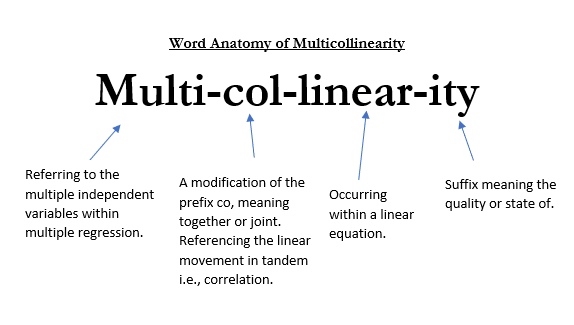

* Multi : 다중 회귀의 여러 독립 변수를 의미
* col- : 전치사 co를 의미 (같이, 합쳐진) 
* linear : 선형식에서 발생한다는 의미
* -ity : ~ 현상을 의미

다중 회귀 분석 (통계)에서 독립 변수들 사이에 강한 관계성이 나타나는 문제입니다.

이로 인해 중요한 영향을 주어야 할 만한 독립변수가, 제대로 영향을 주지 못하는 문제가 발생합니다.

이는 선형 회귀 분석의 4대 기본 가정 중 "독립성"을 위반하므로, 반드시 처리해주어야 하는 문제입니다.

In [127]:
iris = pd.read_csv(github)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


petal_width와 petal_length는 sepal_length에 큰 영향을 미치는 (선형 관계에 있는) 유의미한 변수인 것을 확인했습니다.

여기에 petal_length와 매우 유사한 데이터 2개를 추가해보겠습니다.

In [128]:
iris["mc1"] = iris["petal_length"] + np.random.normal()
iris["mc2"] = iris["petal_length"] + np.random.normal()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,mc1,mc2
0,5.1,3.5,1.4,0.2,Iris-setosa,2.502668,3.02364
1,4.9,3.0,1.4,0.2,Iris-setosa,2.502668,3.02364
2,4.7,3.2,1.3,0.2,Iris-setosa,2.402668,2.92364
3,4.6,3.1,1.5,0.2,Iris-setosa,2.602668,3.12364
4,5.0,3.6,1.4,0.2,Iris-setosa,2.502668,3.02364


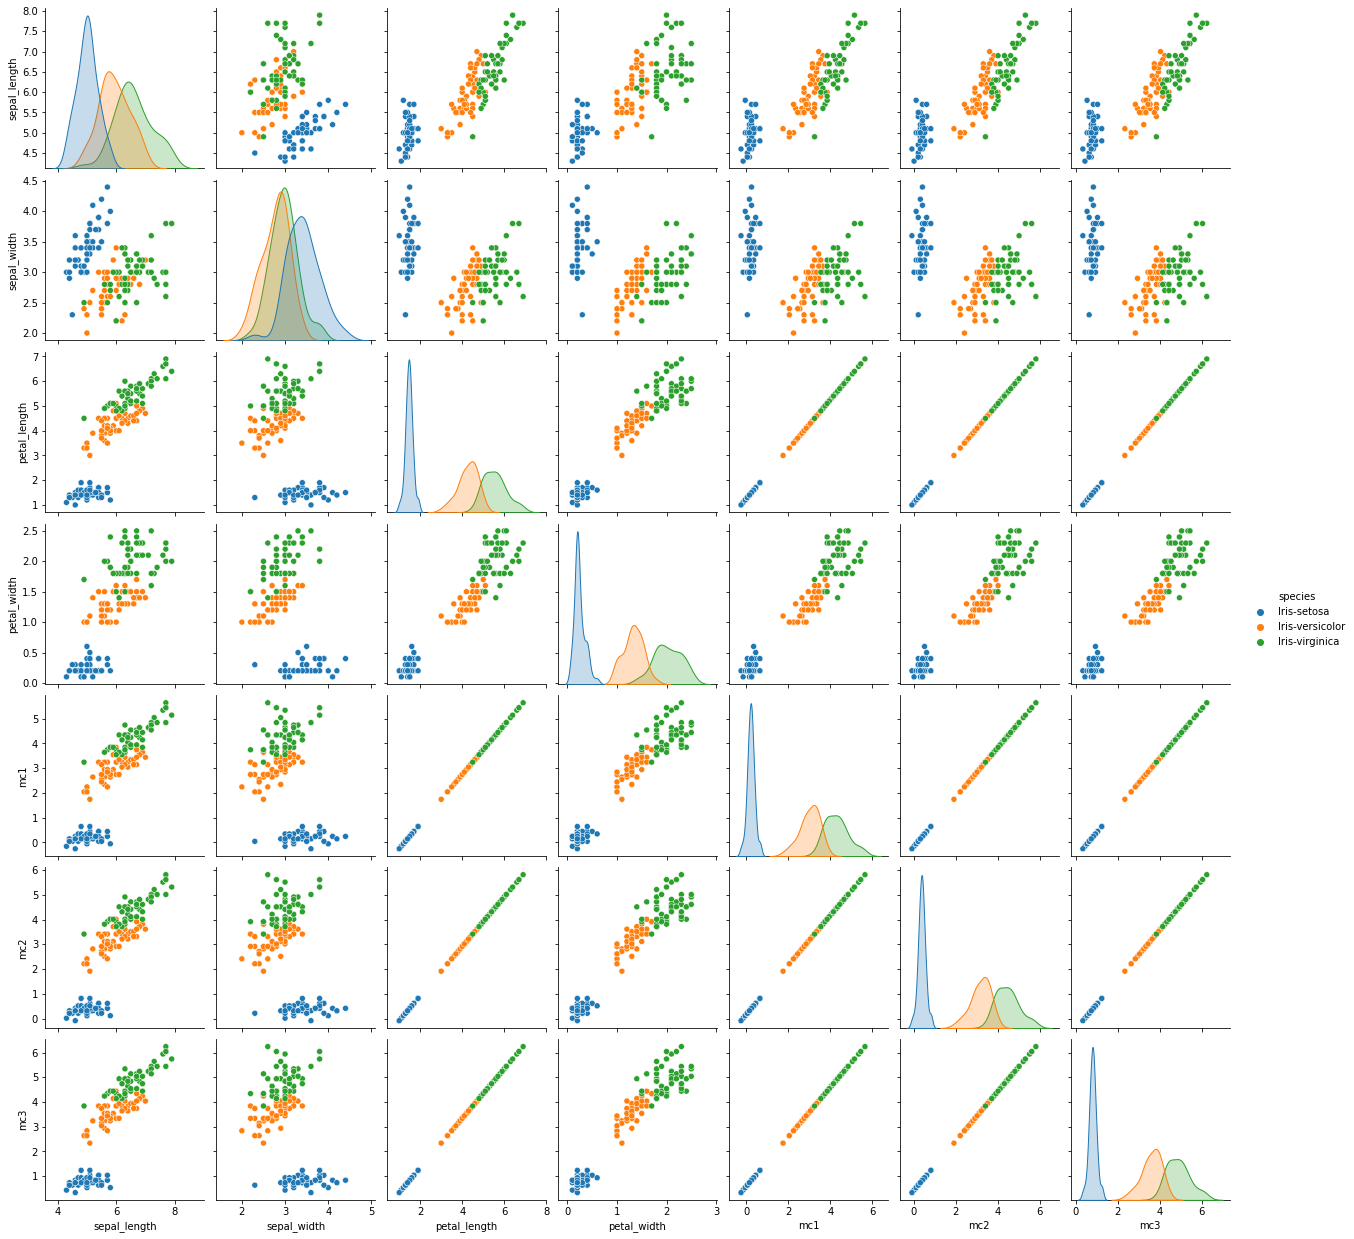

In [129]:
sns.pairplot(iris_mc, hue = "species")

당연히 petal_length, mc1, mc2는 아주 강한 상관 관계를 띄게 됩니다. 
여기서 회귀 분석을 다시 해보겠습니다.

In [132]:
model = ols('sepal_length ~ sepal_width + petal_width + petal_length + mc1 + mc2', iris)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     297.0
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           6.28e-62
Time:                        14:41:00   Log-Likelihood:                -37.000
No. Observations:                 150   AIC:                             82.00
Df Residuals:                     146   BIC:                             94.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5049      0.118      4.275   

이 전에는 영향력이 있던 petal_length의 p-value가 갑자기 0.05이상으로 올라간 것을 볼 수 있습니다.

독립성을 위반하는 변수가 petal_width이외에도 많이 생성되므로서, 중요성이 떨어지게 된 것과 같은 현상입니다.

###### <strong>분산 팽창 인자 (Variance Inflation Factor, VIF)</strong>
* 다중공선성을 진단하는 지표입니다.
* 1부터 무한대까지의 값을 가지게 되며, VIF > 10일시 다중공선성의 위험이 있는 특징으로 판단됩니다.

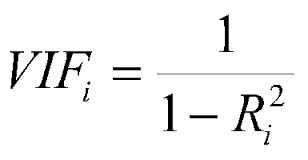

* $R^2$ : 결정계수

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [] 
for i in range(len(iris.columns)-2):
    vif.append(variance_inflation_factor(iris.drop(["sepal_length", "species"], axis = 1).values, i))
print(vif)

[1.2638426041908781, inf, 14.232147823080032, inf, inf]


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [117]:
vif_dataframe = pd.DataFrame()
vif_dataframe['features'] = iris.drop(["sepal_length","species"], axis = 1).columns
vif_dataframe['VIF'] = vif
vif_dataframe

,features,VIF
0,sepal_width,1.263843
1,petal_length,inf
2,petal_width,14.232148
3,mc1,inf
4,mc2,inf


petal_length, mc1, mc2는 완벽한 선형 관계 (perfect collinearity)를 이루고 있기 때문에, 무한대(inf)의 VIF값이 나타나고 있습니다.

또한 petal_width 역시 위 4개의 특징과 선형 관계가 있기 때문에, 높은 VIF값이 발생합니다.

In [118]:
iris = pd.read_csv(github)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [124]:
vif = [] 
for i in range(len(iris.columns)-2):
    vif.append(variance_inflation_factor(iris.drop(["sepal_length", "species"], axis = 1).values, i))
vif_dataframe = pd.DataFrame()
vif_dataframe['features'] = iris.drop(["sepal_length","species"], axis = 1).columns
vif_dataframe['VIF'] = vif
vif_dataframe

,features,VIF
0,sepal_width,5.896727
1,petal_length,61.750178
2,petal_width,42.917554


다시 기존 iris로 돌아와도, petal_length와 petal_width는 높은 상관관계, 즉 다중공선성을 이루고 있는것을 VIF를 통해 확인할 수 있습니다.

In [123]:
vif = [] 
for i in range(len(iris.columns)-3):
    vif.append(variance_inflation_factor(iris.drop(["petal_width", "sepal_length", "species"], axis = 1).values, i))
vif_dataframe = pd.DataFrame()
vif_dataframe['features'] = iris.drop(["petal_width", "sepal_length","species"], axis = 1).columns
vif_dataframe['VIF'] = vif
vif_dataframe

,features,VIF
0,sepal_width,4.169312
1,petal_length,4.169312


다중공선성은 다음과 같이 깊은 관계(collinearity)를 보이는 특징을 제거하므로서 해결할 수 있습니다.

##### <strong> 3. 등분산성 (Homoscedasticity)</strong>

특정한 패턴 없이 고르게 분포되었는가? (분산이 일정한가?)

* 선형 회귀 모델을 만들고, 최적의 선을 그린 후, 최적의 선에 의한 예측 값들과 residual들을 시각화하였을때, 특정 패턴이 보여지지 않아야 합니다.

In [144]:
iris = pd.read_csv(github)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [154]:
new_data = np.concatenate((np.random.normal(1, 0.3, len(iris)//2), np.random.normal(10, 0.3, len(iris)//2)), axis = None)
iris["new_data"] = new_data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,new_data
0,5.1,3.5,1.4,0.2,Iris-setosa,0.949313
1,4.9,3.0,1.4,0.2,Iris-setosa,0.989104
2,4.7,3.2,1.3,0.2,Iris-setosa,0.477889
3,4.6,3.1,1.5,0.2,Iris-setosa,0.926985
4,5.0,3.6,1.4,0.2,Iris-setosa,1.238921


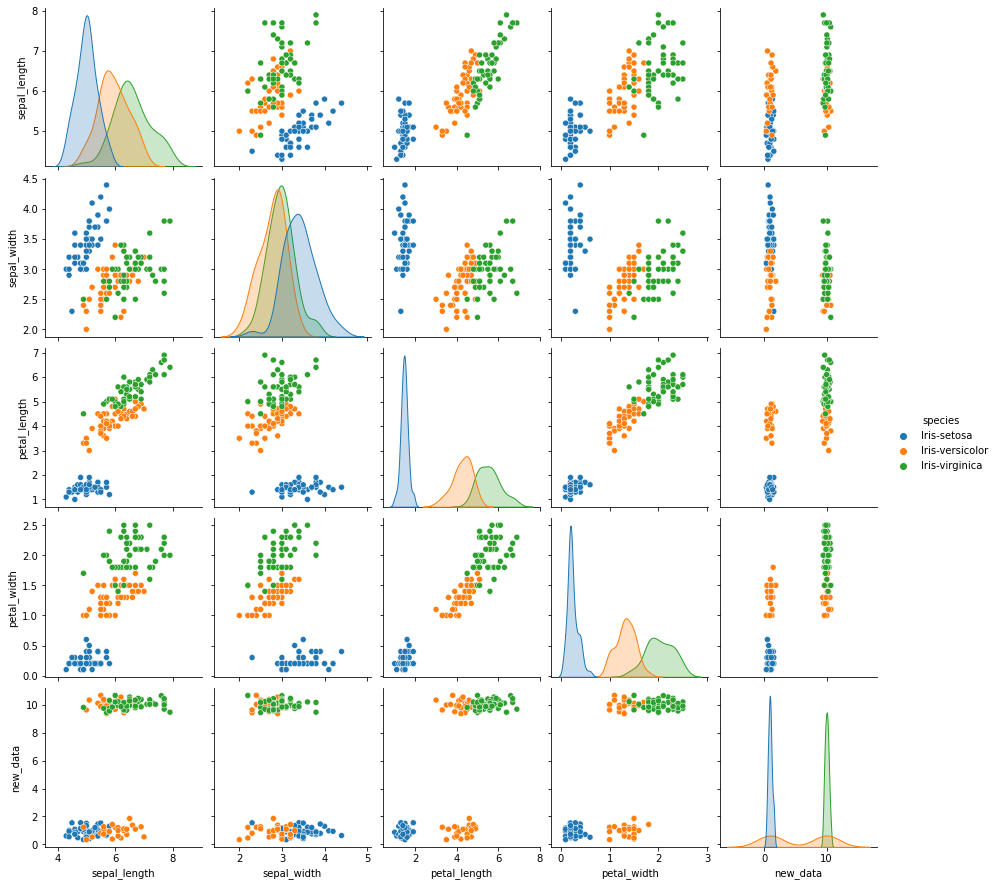

In [155]:
sns.pairplot(iris, hue = "species")

이상한 새로운 데이터 new_data를 만들었습니다. 
현재 가진 특징들을 활용하여 new_data를 종속변수로 하여 선형 회귀 모델로 예측해보겠습니다.

In [156]:
model = ols('new_data ~ sepal_length + sepal_width + petal_width + petal_length', iris)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               new_data   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     57.27
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           6.57e-29
Time:                        14:58:37   Log-Likelihood:                -368.67
No. Observations:                 150   AIC:                             747.3
Df Residuals:                     145   BIC:                             762.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.2721      2.686      1.218   

모든 특징이 전부 무의미한 p-value를 가지게 되었습니다.

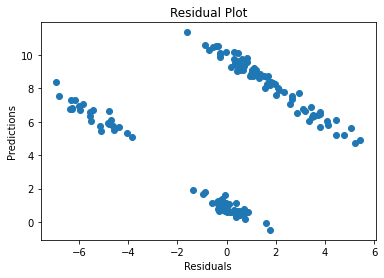

In [186]:
def get_residual(y_true, y_pred):
  return y_true - y_pred

def predict(features):
  return 3.2721 + (-1.1186 * features[0]) + (0.1256 * features[1]) + (1.4781 * features[2]) + (2.3357 * features[3])

predictions = [predict(i) for i in iris.iloc[:, :-2].values] 
residuals = [get_residual(iris["new_data"][i], predictions[i]) for i in range(len(iris["new_data"]))]

plt.title("Residual Plot")
plt.xlabel("Residuals")
plt.ylabel("Predictions")
plt.scatter(residuals, predictions)
plt.show()

아까 위에서 1, 그리고 10의 분포를 갖는 데이터를 절반씩 만들었습니다.


residual의 값들이 이렇게 2~3개의 덩어리를 가진 패턴이 나온다는 것은, 이를 해결하기 위한 매우 중요한 데이터가 누락되어있다는 것을 의미합니다.

##### <strong> 4. 정규성 (Normality) </strong>

데이터가 (최적의 선 주변으로) 정규 분포를 이루는가?
* **Q-Q plot**(Quantile-Quantile plot)으로 residual의 분포를 시각화하여 정규성을 확인합니다.
* residual이 일직선(선형)의 형태로 나타난다면 정규 분포가 되어있다는 의미이고, 그렇지 않다면 정규 분포를 이루고 있지 않다는 의미입니다.

In [2]:
iris = pd.read_csv(github)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
new_data = np.concatenate(
    (np.random.normal(1, 0.3, 20), 
     np.random.normal(6, 0.3, 30), 
     np.random.normal(7, 1, 100)), axis = None)
iris["new_data"] = new_data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,new_data
0,5.1,3.5,1.4,0.2,Iris-setosa,1.428370
1,4.9,3.0,1.4,0.2,Iris-setosa,0.911748
2,4.7,3.2,1.3,0.2,Iris-setosa,0.693597
3,4.6,3.1,1.5,0.2,Iris-setosa,0.947946
4,5.0,3.6,1.4,0.2,Iris-setosa,0.988294


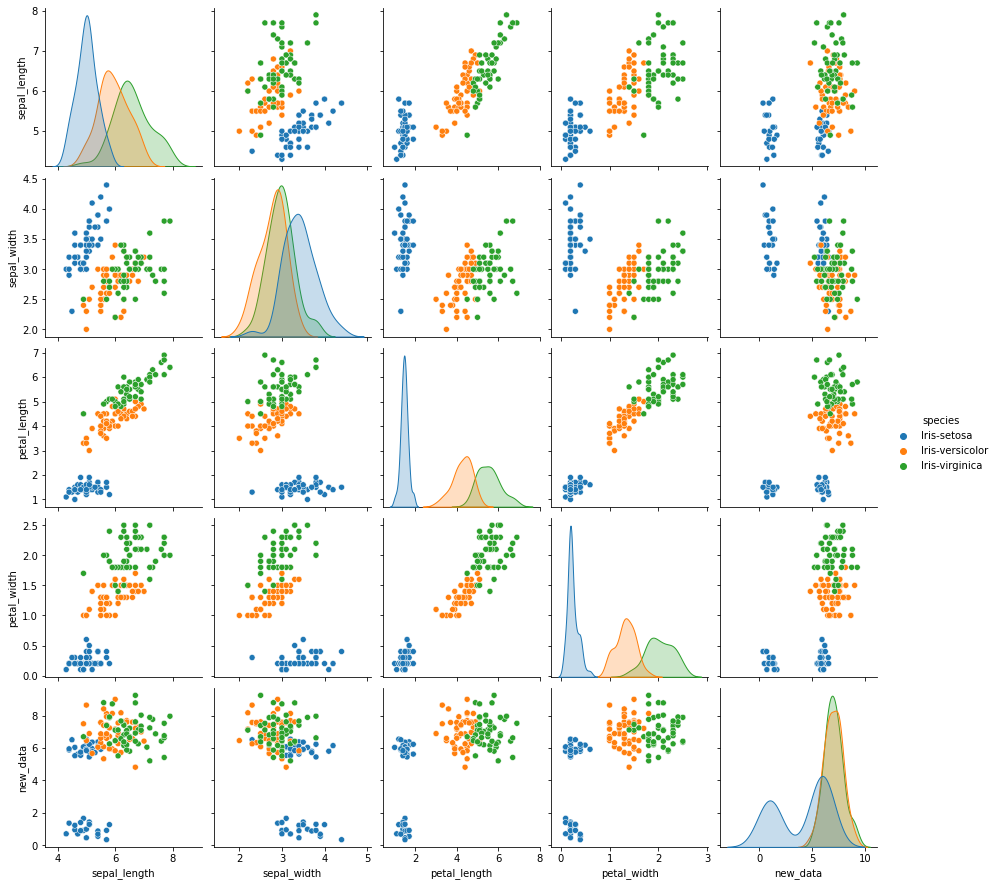

In [9]:
sns.pairplot(iris, hue = "species")

한쪽에 데이터가 몰려 정규분포가 아닌 새로운 변수를 추가했습니다.

new_data를 종속변수로 예측하는 회귀분석을 해봅시다.

In [10]:
from statsmodels.formula.api import ols

model = ols('new_data ~ sepal_length+sepal_width+petal_length+petal_width', iris)
res = model.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:               new_data   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     28.22
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           2.42e-17
Time:                        00:46:37   Log-Likelihood:                -282.95
No. Observations:                 150   AIC:                             575.9
Df Residuals:                     145   BIC:                             591.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.1583      1.517      5.379   

정규분포가 아닌 데이터에서는 많은 독립 변수들이 무의미하다는 것을 볼 수 있습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


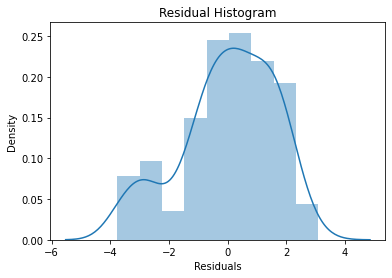

In [16]:
def get_residual(y_true, y_pred):
  return y_true - y_pred

def predict(features):
  return 8.1583 + (-0.2106 * features[0]) + (-1.1289 * features[1]) + (0.4896 * features[2]) + (0.5523 * features[3])

predictions = [predict(i) for i in iris.iloc[:, :-2].values] 
residuals = [get_residual(iris["new_data"][i], predictions[i]) for i in range(len(iris["new_data"]))]

plt.title("Residual Histogram")
plt.xlabel("Residuals")
sns.distplot(residuals)
plt.show()

Residual의 히스토그램을 시각적으로 확인했을때에도, 정규분포가 아닌것을 확인할수 있습니다.

### Example

#### Dataset

In [20]:
import pandas as pd 

boston_housing = "https://raw.githubusercontent.com/dukalee/machine-learning/main/00-Datasets/boston_housing.csv"
data = pd.read_csv(boston_housing)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


#### Visualization

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers(data):
  fig, axes = plt.subplots(2, 7, figsize = (20,7))
  row = 0
  col = 0
  for i in range(len(data.columns)):
    if col > len(data.columns)// 2 - 1:
      row += 1
      col = 0
    sns.boxplot(x = data[data.columns[i]], ax = axes[row][col])
    col += 1

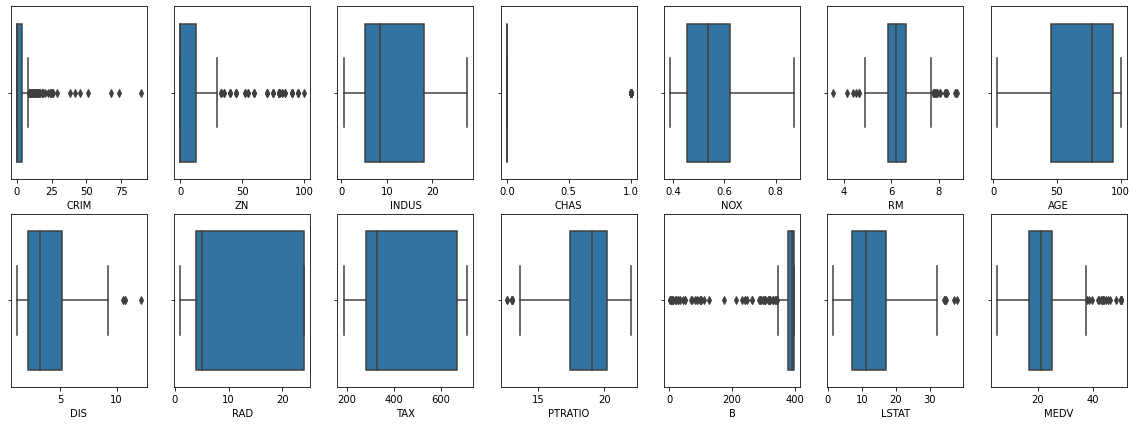

In [52]:
detect_outliers(data)

CRIm, ZN, RM, B, MEDV등에 많은 outlier가 있는 것이 확인됩니다. 

#### Data Preprocessing

In [21]:
data.shape

(506, 14)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [23]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

##### Dropping Null values

In [41]:
data = data.dropna()

In [42]:
data.shape

(394, 14)

##### Outliers

In [65]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

pd.concat([q1, q3], axis = 1)

,0.25,0.75
CRIM,0.081955,3.435973
ZN,0.000000,12.500000
INDUS,5.130000,18.100000
CHAS,0.000000,0.000000
NOX,0.453000,0.624000
RM,5.879250,6.605500
AGE,45.475000,94.250000
DIS,2.110100,5.116700
RAD,4.000000,24.000000
TAX,280.250000,666.000000


In [66]:
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

pd.concat([lower_limit, upper_limit], axis = 1)

,0,1
CRIM,-4.949071,8.466999
ZN,-18.750000,31.250000
INDUS,-14.325000,37.555000
CHAS,0.000000,0.000000
NOX,0.196500,0.880500
RM,4.789875,7.694875
AGE,-27.687500,167.412500
DIS,-2.399800,9.626600
RAD,-26.000000,54.000000
TAX,-298.375000,1244.625000


In [58]:
data_processed = data[~((data < lower_limit) | (data > upper_limit)).any(axis = 1)]
data_processed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


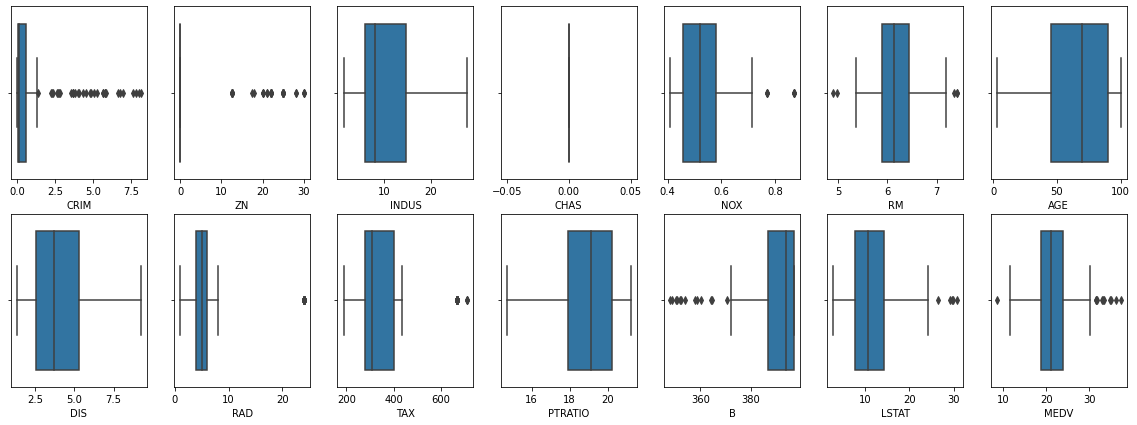

In [56]:
detect_outliers(data_processed)

In [138]:
data_processed = data_processed.drop("CHAS", axis = 1)
data_processed

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


##### Train Test Split

In [430]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_processed.iloc[:, :-1], data_processed.iloc[:, -1],
                                                    test_size = 0.3, random_state=101)

##### Feature Scaling 

In [431]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_fit = mms.fit_transform(X_train)
X_test_fit = mms.transform(X_test)

##### Multicollinearity

In [432]:
ols_data = pd.DataFrame(X_train_fit, columns = data_processed.columns[:-1])
ols_data["MEDV"] = y_train.values
ols_data

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.010865,0.416667,0.231335,0.248918,0.392985,0.371782,0.611810,0.173913,0.235182,0.076923,0.868772,0.473138,21.7
1,0.003472,0.000000,0.127660,0.229437,0.385014,0.446962,0.579051,0.173913,0.068834,0.846154,1.000000,0.254168,19.5
2,0.005874,0.700000,0.145068,0.064935,0.640893,0.187436,0.815071,0.130435,0.105163,0.323077,1.000000,0.086699,25.0
3,0.014531,0.000000,0.314120,0.298701,0.402551,0.926880,0.150158,0.217391,0.466539,0.476923,0.960016,0.491664,18.8
4,0.016053,0.416667,0.161702,0.000000,0.275409,0.349125,0.767870,0.130435,0.300191,0.646154,1.000000,0.376065,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.005034,0.000000,0.058801,0.173160,0.603428,0.650875,0.260284,0.043478,0.156788,0.476923,0.903219,0.217488,22.6
145,0.017683,0.000000,0.258027,0.240260,0.726983,0.792997,0.213411,0.173913,0.374761,0.953846,0.956121,0.240089,27.5
146,0.026809,0.000000,0.314120,0.298701,0.473894,0.952626,0.179161,0.217391,0.466539,0.476923,1.000000,0.524268,18.7
147,0.077157,0.000000,0.241779,0.279221,0.371064,0.552008,0.469879,0.130435,0.227533,0.969231,0.973754,0.204891,19.9


In [433]:
from statsmodels.formula.api import ols

model = ols('MEDV ~ {}'.format('+'.join(ols_data.columns[:-1])), ols_data)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     33.34
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           1.11e-34
Time:                        04:59:15   Log-Likelihood:                -332.86
No. Observations:                 149   AIC:                             691.7
Df Residuals:                     136   BIC:                             730.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.9013      1.650     16.905      0.0

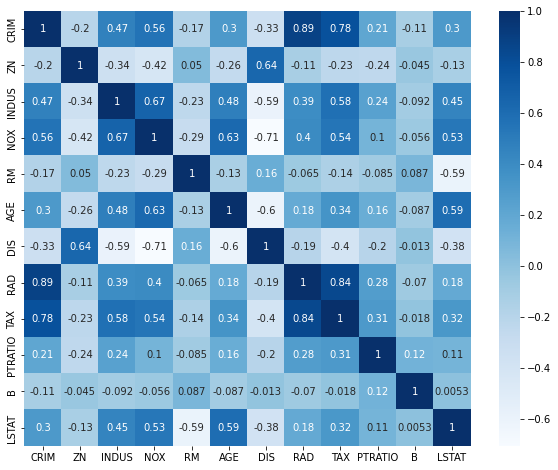

In [434]:
plt.figure(figsize = (10, 8))
sns.heatmap(ols_data.drop("MEDV", axis = 1).corr(), cmap = "Blues", annot = True)

In [435]:
ols_data.drop("MEDV", axis = 1).corr()[ols_data.drop("MEDV", axis = 1).corr() > 0.5]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,NaN,NaN,0.557216,NaN,NaN,NaN,0.886530,0.781239,NaN,NaN,NaN
ZN,NaN,1.000000,NaN,NaN,NaN,NaN,0.639429,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.000000,0.666876,NaN,NaN,NaN,NaN,0.578642,NaN,NaN,NaN
NOX,0.557216,NaN,0.666876,1.000000,NaN,0.625603,NaN,NaN,0.542268,NaN,NaN,0.527876
RM,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,0.625603,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.594635
DIS,NaN,0.639429,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
RAD,0.886530,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.841651,NaN,NaN,NaN
TAX,0.781239,NaN,0.578642,0.542268,NaN,NaN,NaN,0.841651,1.000000,NaN,NaN,NaN
PTRATIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [436]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(data, drop_data):
  vif = [] 
  vif_data = data.drop(drop_data, axis = 1)
  for i in range(len(data.columns)-len(drop_data)):
      vif.append(variance_inflation_factor(vif_data.values, i))
  vif_dataframe = pd.DataFrame()
  vif_dataframe['features'] = vif_data.columns
  vif_dataframe['VIF'] = vif
  return vif_dataframe

In [437]:
get_vif(ols_data, ["MEDV"])

,features,VIF
0,CRIM,8.188475
1,ZN,2.164705
2,INDUS,6.656978
3,NOX,10.081709
4,RM,15.447431
5,AGE,18.727297
6,DIS,7.635211
7,RAD,15.729012
8,TAX,13.140246
9,PTRATIO,7.440132


##### Feature Selection

물론 다양한 Feature Selection 방법들 (LassoCV등) 이 있지만, 단순히 여러 개를 조합하여 VIF를 줄여보도록 하겠습니다.

In [438]:
get_vif(ols_data, ["MEDV", "B", "RAD", "AGE"])

,features,VIF
0,CRIM,3.571013
1,ZN,2.105145
2,INDUS,6.497052
3,NOX,8.726418
4,RM,7.955611
5,DIS,6.537699
6,TAX,8.266414
7,PTRATIO,6.479228
8,LSTAT,6.464081


In [439]:
test_data = pd.DataFrame(X_test_fit, columns = data_processed.columns[:-1])
test_data

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.020483,0.000000,0.258027,0.240260,0.371861,0.916581,0.128935,0.173913,0.374761,0.953846,0.974780,0.582438
1,0.003082,0.000000,0.096712,0.071429,0.442806,0.469619,0.993755,0.086957,0.313576,0.630769,0.769120,0.281215
2,0.002787,0.933333,0.508704,0.119048,0.521323,0.267765,0.345773,0.130435,0.156788,0.538462,0.988312,0.121156
3,0.458016,0.000000,0.627079,0.658009,0.587086,0.880536,0.182008,1.000000,0.913958,0.846154,0.887841,0.433864
4,0.049159,0.000000,0.309865,0.292208,0.589478,0.662204,0.325891,0.130435,0.221797,0.569231,0.965348,0.274917
...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.154727,0.000000,0.241779,0.279221,0.265843,0.980433,0.365447,0.130435,0.227533,0.969231,0.583145,0.669878
61,0.002608,0.000000,0.200387,0.129870,0.605022,0.782698,0.539704,0.043478,0.103250,0.476923,1.000000,0.229715
62,0.001639,0.583333,-0.019729,0.015368,0.877242,0.582904,1.173990,0.086957,0.053537,0.600000,0.924954,0.189329
63,0.015063,1.000000,0.117602,0.041126,0.593862,0.050463,0.847979,0.217391,0.214149,0.292308,0.545007,0.083364


In [440]:
X_train = ols_data.drop(["MEDV", "B", "RAD", "AGE"], axis = 1).values
X_test = test_data.drop(["B", "RAD", "AGE"], axis = 1).values

#### Multiple Linear Regression Model

In [443]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Evaluation

In [444]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

print(r2_score(y_test, y_pred))
print(mse(y_test, y_pred))

0.6046870675581402
10.505378023138427


#### Multiple Linear Regression Model with No preprocessing

In [445]:
data = data.dropna()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [446]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [448]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [449]:
y_pred = lr.predict(X_test)

print(r2_score(y_test, y_pred))
print(mse(y_test, y_pred))

0.7381541421522779
19.808422990677155


결정계수의 값 자체는 높지만, MSE (loss)의 값은 더 높은 것을 확인할 수 있습니다.